In [47]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn

In [48]:
df=pd.read_csv("salary_dataset_with_role_hierarchy.csv")
df

,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,Diploma,8,Urban,Manager,63,Male,58452.377400
1,PhD,11,Suburban,Director,59,Male,116411.686694
2,Bachelor,28,Suburban,Manager,61,Female,122353.651205
3,Diploma,29,Rural,Director,45,Male,113815.514358
4,PhD,25,Urban,Analyst,26,Female,65619.241569
...,...,...,...,...,...,...,...
1595,Bachelor,0,Rural,Web Developer,24,Female,30689.695220
1596,Bachelor,0,Rural,Web Developer,20,Female,29547.562805
1597,Bachelor,0,Urban,Web Developer,23,Male,30089.012862
1598,Bachelor,0,Suburban,Software Developer,21,Female,33835.343031


In [49]:
df.shape

(1600, 7)

In [50]:
df.columns

Index(['Education', 'Experience', 'Location', 'Job_Title', 'Age', 'Gender',
       'Salary'],
      dtype='object')

In [51]:
df.info()
#data is in data uniformity correctly no need toconversion of data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Education   1600 non-null   object 
 1   Experience  1600 non-null   int64  
 2   Location    1600 non-null   object 
 3   Job_Title   1600 non-null   object 
 4   Age         1600 non-null   int64  
 5   Gender      1600 non-null   object 
 6   Salary      1600 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 87.6+ KB


In [52]:
df.isna().sum()

Education     0
Experience    0
Location      0
Job_Title     0
Age           0
Gender        0
Salary        0
dtype: int64

DATA CLEANING


In [53]:
#lets clean a EDUCATION column.
len_of_unique_values=len(df["Education"].unique())
len_of_unique_values

unique_values=df["Education"].unique()
unique_values

df['Education'] =df['Education'].replace({
    'Master': 'Masters',
    'masters': 'Masters',
    'master': 'Masters',
    'Ph.d': 'PhD',
    'phd': 'PhD',
    'ph.D': 'PhD'
})

unique_values=df["Education"].unique()
unique_values


nullvalues=df[df["Education"].isnull()]
nullvalues

# df["Education"].isna().sum()


,Education,Experience,Location,Job_Title,Age,Gender,Salary


In [54]:
#lets clean a Experience column.
len_of_unique_values=len(df["Experience"].unique())
len_of_unique_values

unique_values=df["Experience"].unique()
unique_values

# nullvalues=df[df["Experience"].isnull()]
# nullvalues





array([ 8, 11, 28, 29, 25, 19,  4, 13, 20, 14, 23,  1,  7, 26,  3, 21, 12,
        5, 10,  2, 16, 24,  6, 22,  9, 17, 27, 18, 15,  0], dtype=int64)

In [55]:
#lets clean a Location column.

len_of_unique_values=len(df["Location"].unique())
len_of_unique_values

unique_values=df["Location"].unique()
unique_values

nullvalues=df[df["Location"].isnull()]
nullvalues

,Education,Experience,Location,Job_Title,Age,Gender,Salary


In [56]:
#lets clean a Job_Title column.

len_of_unique_values=len(df["Job_Title"].unique())
len_of_unique_values

unique_values=df["Job_Title"].unique()
unique_values

nullvalues=df[df["Job_Title"].isnull()]
nullvalues

,Education,Experience,Location,Job_Title,Age,Gender,Salary


In [57]:
#lets clean a Age column.

len_of_unique=len(df["Age"].unique())
len_of_unique

df["Age"].unique()


nullvalues=df[df["Age"].isnull()]
nullvalues

,Education,Experience,Location,Job_Title,Age,Gender,Salary


In [58]:
# lets clean a Gender column.

len_of_unique_values=len(df["Gender"].unique())
len_of_unique_values

unique_values=df["Gender"].unique()
unique_values

nullvalues=df[df["Gender"].isnull()]
nullvalues

,Education,Experience,Location,Job_Title,Age,Gender,Salary


In [59]:
# lets clean a salary column.


nullvalues=df[df["Salary"].isnull()]
nullvalues
len(df["Salary"].unique())



1600

Data preprocessing


In [60]:
df.describe()

,Experience,Age,Salary
count,1600.000000,1600.000000,1600.000000
mean,9.231875,34.875625,62549.603625
std,9.728104,14.513720,33830.580110
min,0.000000,20.000000,20484.906659
25%,0.000000,22.000000,36903.994999
50%,6.000000,27.000000,49305.255495
75%,18.000000,48.000000,81574.781803
max,29.000000,64.000000,184137.306279


In [61]:
#Lets find outliers by IQR method Iqr=75% values - 25% values

iqr_salary=81574.78 - 36903.99
iqr_salary
lower_bond_salary=36903.99 - (1.5 * 44670.79)
lower_bond_salary
upper_bond_salary=81574.78 + (1.5 * 44670.79) 
upper_bond_salary

len(df[df["Salary"]>upper_bond_salary]) #29
df[df["Salary"]>upper_bond_salary] # There are PHD,directors with experience >21 so its ok to keep these
#26 rows because director has high impact role than other job roles nd experience also >20



,Education,Experience,Location,Job_Title,Age,Gender,Salary
37,PhD,24,Suburban,Director,23,Female,164290.230606
81,PhD,27,Suburban,Director,58,Male,161697.164720
118,PhD,29,Urban,Director,63,Male,183199.890030
156,PhD,24,Suburban,Director,24,Male,163851.397969
190,PhD,21,Rural,Director,61,Male,149736.906938
327,PhD,24,Rural,Director,25,Female,160079.564838
353,Masters,27,Urban,Director,48,Female,155842.772241
355,Masters,25,Urban,Director,64,Male,152159.341505
357,Bachelor,29,Urban,Director,24,Male,153089.859825
363,PhD,26,Rural,Director,26,Male,158478.315882


In [62]:
df=df[~((df["Age"] <= 25) & (df["Experience"] >= 10))]
df


,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,Diploma,8,Urban,Manager,63,Male,58452.377400
1,PhD,11,Suburban,Director,59,Male,116411.686694
2,Bachelor,28,Suburban,Manager,61,Female,122353.651205
3,Diploma,29,Rural,Director,45,Male,113815.514358
4,PhD,25,Urban,Analyst,26,Female,65619.241569
...,...,...,...,...,...,...,...
1595,Bachelor,0,Rural,Web Developer,24,Female,30689.695220
1596,Bachelor,0,Rural,Web Developer,20,Female,29547.562805
1597,Bachelor,0,Urban,Web Developer,23,Male,30089.012862
1598,Bachelor,0,Suburban,Software Developer,21,Female,33835.343031


In [63]:
df.columns

Index(['Education', 'Experience', 'Location', 'Job_Title', 'Age', 'Gender',
       'Salary'],
      dtype='object')

In [64]:
#lets drop un usefull columns which are not that much usefull
df.drop(["Gender"],axis=1,inplace=True)
df
df=df.drop(df.columns[[2]],axis=1)  #because location index=2
df


C:\Users\sanga\AppData\Local\Temp\ipykernel_12096\1208681727.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(["Gender"],axis=1,inplace=True)


,Education,Experience,Job_Title,Age,Salary
0,Diploma,8,Manager,63,58452.377400
1,PhD,11,Director,59,116411.686694
2,Bachelor,28,Manager,61,122353.651205
3,Diploma,29,Director,45,113815.514358
4,PhD,25,Analyst,26,65619.241569
...,...,...,...,...,...
1595,Bachelor,0,Web Developer,24,30689.695220
1596,Bachelor,0,Web Developer,20,29547.562805
1597,Bachelor,0,Web Developer,23,30089.012862
1598,Bachelor,0,Software Developer,21,33835.343031


In [65]:
df.describe()

,Experience,Age,Salary
count,1496.000000,1496.000000,1496.000000
mean,8.558824,35.752005,60647.126439
std,9.599151,14.603775,32866.667975
min,0.000000,20.000000,20484.906659
25%,0.000000,23.000000,36325.048461
50%,5.000000,30.000000,46935.828509
75%,17.000000,49.000000,78323.361984
max,29.000000,64.000000,183199.890030


In [66]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
Index: 1496 entries, 0 to 1599
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Education   1496 non-null   object 
 1   Experience  1496 non-null   int64  
 2   Job_Title   1496 non-null   object 
 3   Age         1496 non-null   int64  
 4   Salary      1496 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 70.1+ KB


Index(['Education', 'Experience', 'Job_Title', 'Age', 'Salary'], dtype='object')

Data Visualization

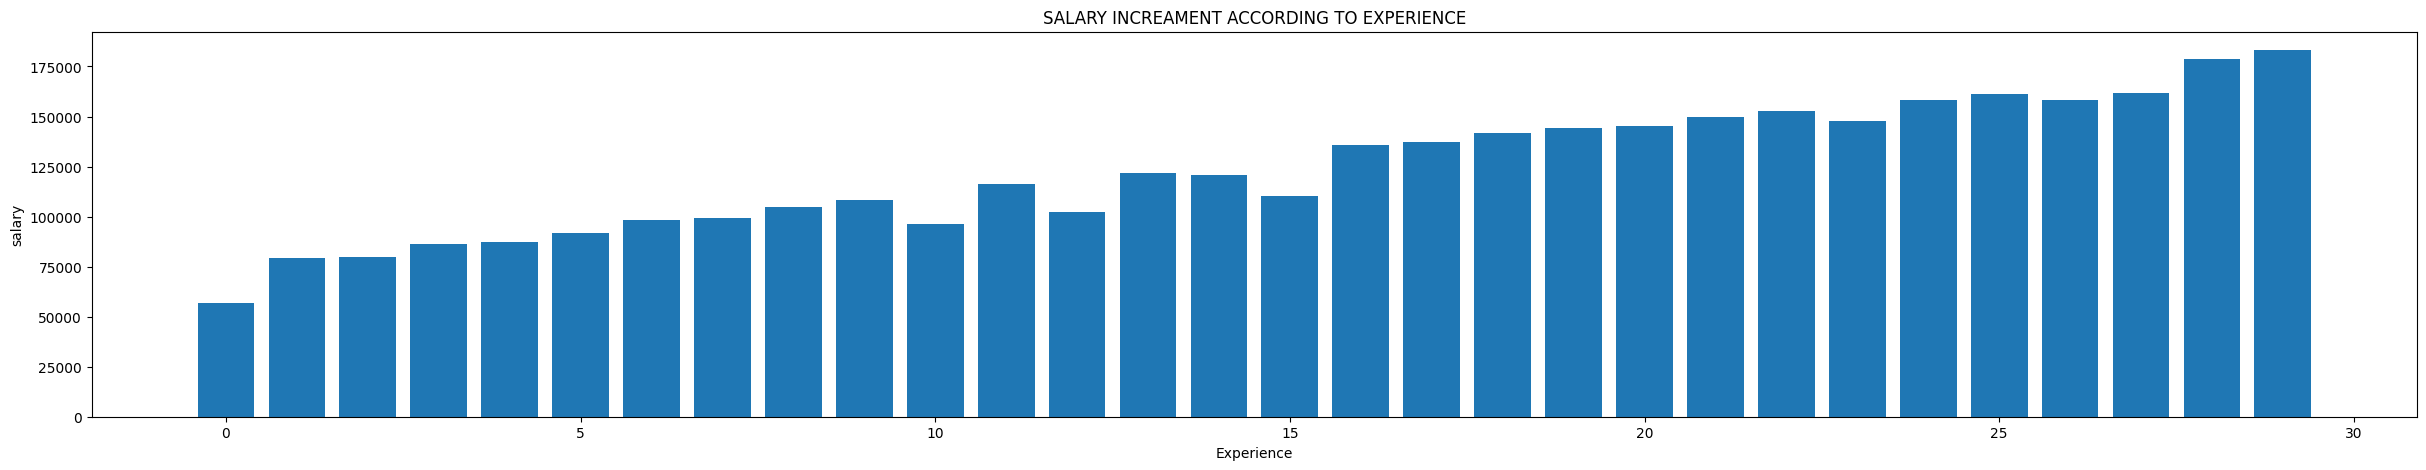

In [67]:
#Data visualization

plt.figure(figsize=(30,5))
plt.xlabel("Experience")
plt.ylabel("salary")
plt.title("SALARY INCREAMENT ACCORDING TO EXPERIENCE")

plt.bar(df["Experience"],df["Salary"]);

#we didnt find correct visualization on increament by experience but slightly it is incremeant by experience

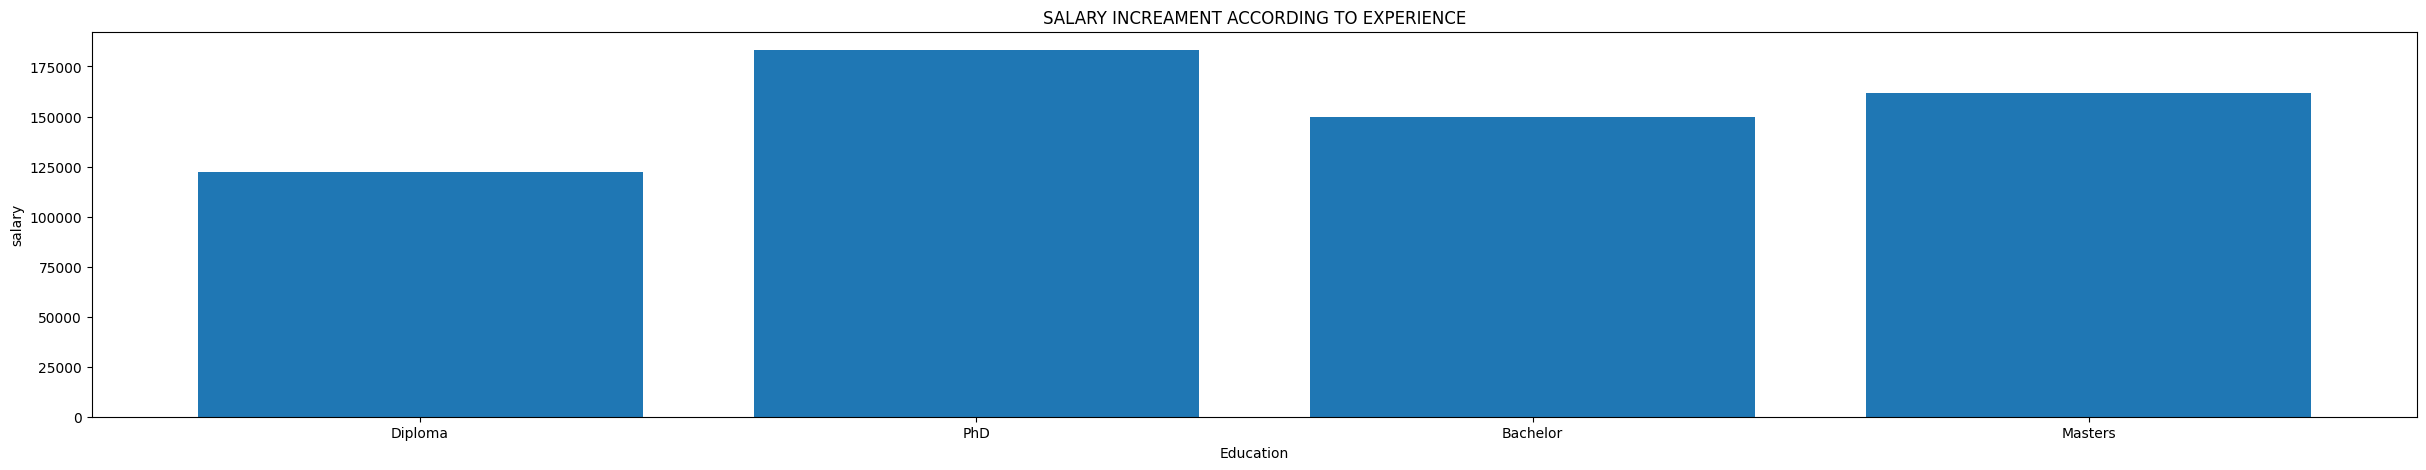

In [68]:
plt.figure(figsize=(30,5))
plt.xlabel("Education")
plt.ylabel("salary")
plt.title("SALARY INCREAMENT ACCORDING TO EXPERIENCE")

plt.bar(df["Education"],df["Salary"]);

#we found that salary is more depend on the Education more than the expeerience

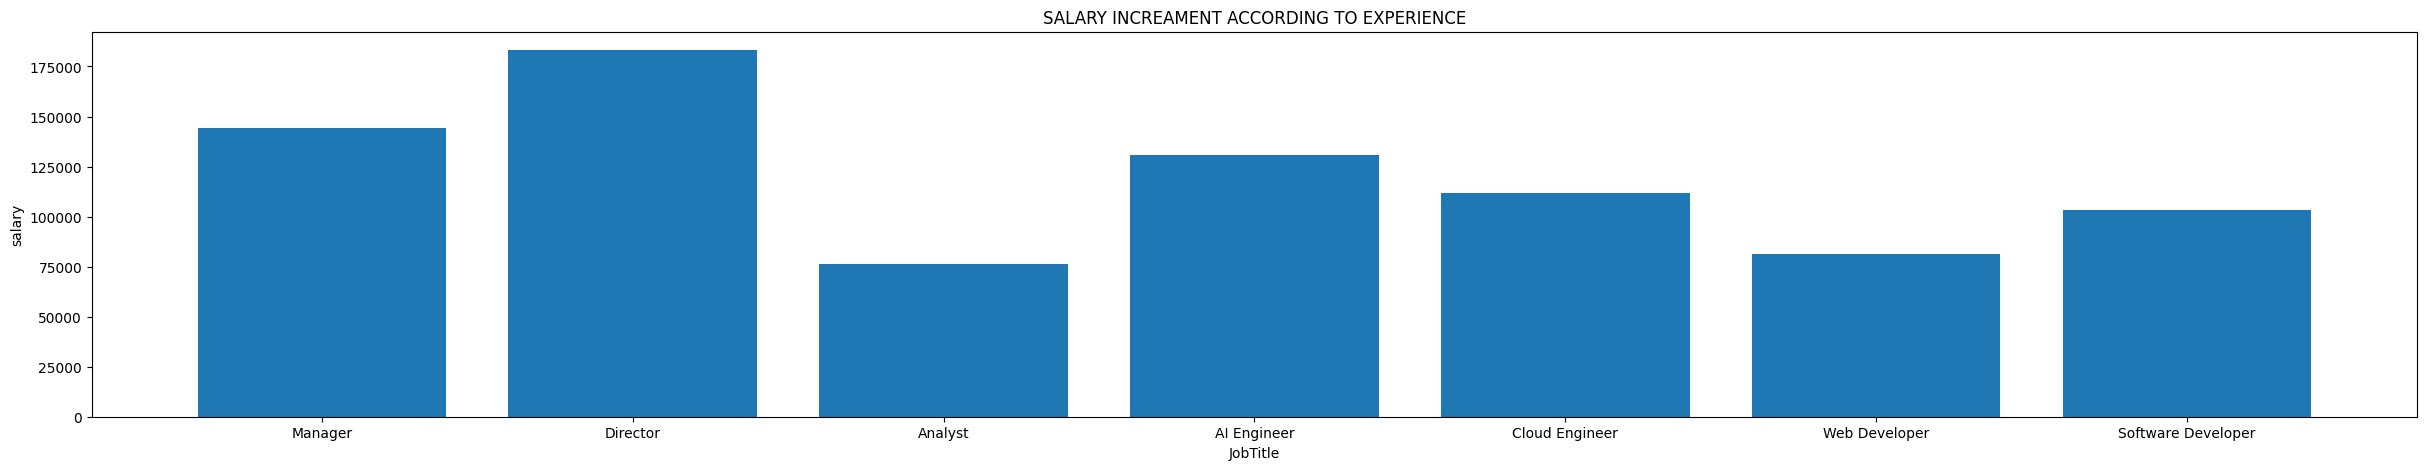

In [69]:
plt.figure(figsize=(30,5))
plt.xlabel("JobTitle")
plt.ylabel("salary")
plt.title("SALARY INCREAMENT ACCORDING TO EXPERIENCE")

plt.bar(df["Job_Title"],df["Salary"]);

#director job role have the highest salary than the other job roles 


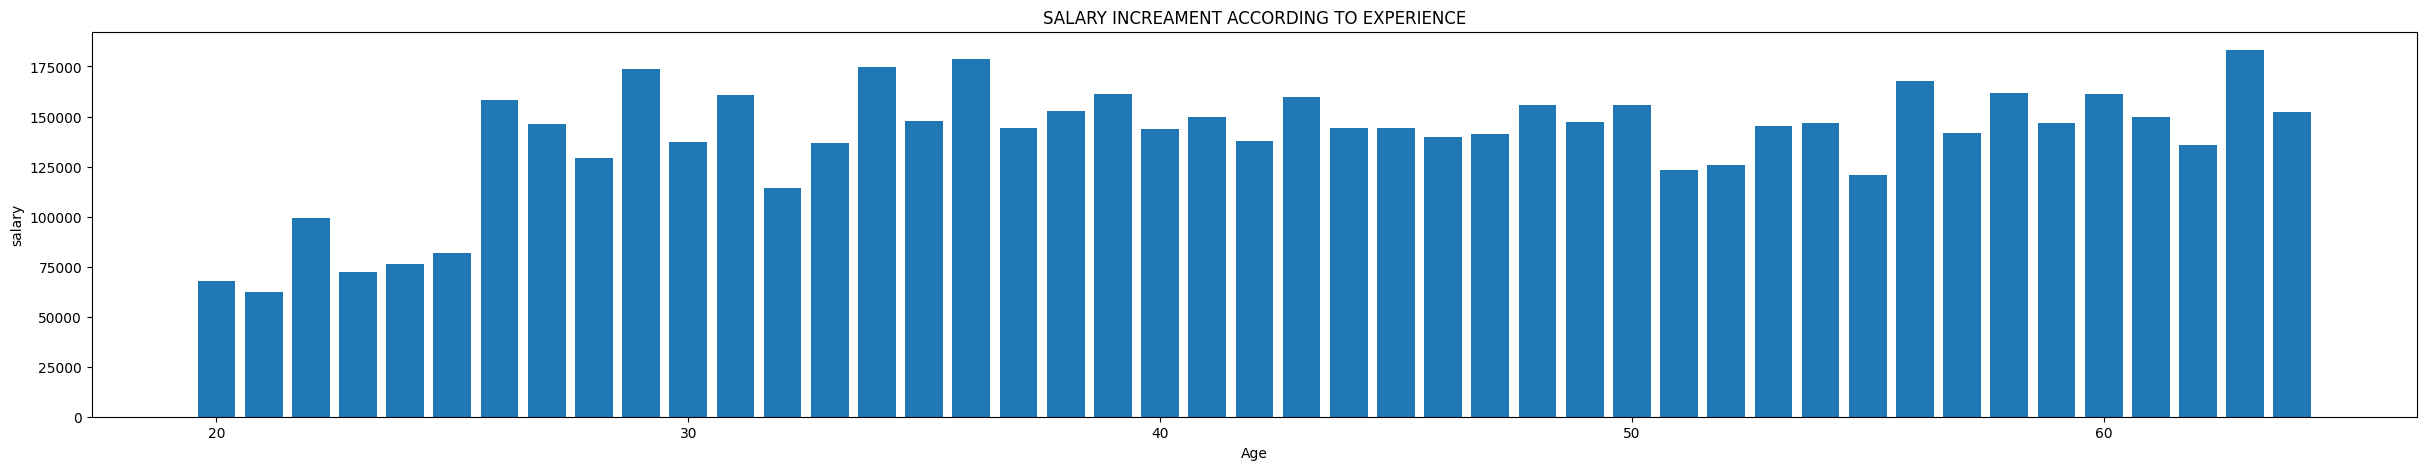

In [70]:
plt.figure(figsize=(30,5))
plt.xlabel("Age")
plt.ylabel("salary")
plt.title("SALARY INCREAMENT ACCORDING TO EXPERIENCE")

plt.bar(df["Age"],df["Salary"]);

#salaary is not predictable that much by age


Data preprocessing according to our needs to create a model after seeing visualization.


In [71]:
df["Education"].dtype
df["Job_Title"].dtype

# salary is more clear analysing through Education and job_title so these both the values dtype object(string) so we convert them to numeric
# by map fctn or one hot encoding or dummy variables
#because the further training and testing go through a numerical data it dont accept categeorical data..



# df['Job_Title'].unique()
# df['Education']=df['Education'].map({"High School":0,"PhD":1,"Bachelor":2,"Master":3})
# df["Job_Title"]=df["Job_Title"].map({'Manager':0, 'Director':1, 'Analyst':2, 'Engineer':3})

# df


dtype('O')

In [72]:
df=pd.get_dummies(df,columns=["Education","Job_Title"]).astype(int)
df


,Experience,Age,Salary,Education_Bachelor,Education_Diploma,Education_Masters,Education_PhD,Job_Title_AI Engineer,Job_Title_Analyst,Job_Title_Cloud Engineer,Job_Title_Director,Job_Title_Manager,Job_Title_Software Developer,Job_Title_Web Developer
0,8,63,58452,0,1,0,0,0,0,0,0,1,0,0
1,11,59,116411,0,0,0,1,0,0,0,1,0,0,0
2,28,61,122353,1,0,0,0,0,0,0,0,1,0,0
3,29,45,113815,0,1,0,0,0,0,0,1,0,0,0
4,25,26,65619,0,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,0,24,30689,1,0,0,0,0,0,0,0,0,0,1
1596,0,20,29547,1,0,0,0,0,0,0,0,0,0,1
1597,0,23,30089,1,0,0,0,0,0,0,0,0,0,1
1598,0,21,33835,1,0,0,0,0,0,0,0,0,1,0


In [73]:
df.dtypes

Experience                      int32
Age                             int32
Salary                          int32
Education_Bachelor              int32
Education_Diploma               int32
Education_Masters               int32
Education_PhD                   int32
Job_Title_AI Engineer           int32
Job_Title_Analyst               int32
Job_Title_Cloud Engineer        int32
Job_Title_Director              int32
Job_Title_Manager               int32
Job_Title_Software Developer    int32
Job_Title_Web Developer         int32
dtype: object

Training and testing the model 

In [74]:
#lets give input of multi ip variabless and output.
df

x=df.drop(["Salary"],axis=1)#always give input in double square brackets[[]] but you want to drop one column and use all means use this
                            #Written df.drop()method
y=df["Salary"]







In [75]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=7680)
x_train
#checking the correct percentage is given to train and test splits.
# x_train
# x_test
# y_train
# y_test



,Experience,Age,Education_Bachelor,Education_Diploma,Education_Masters,Education_PhD,Job_Title_AI Engineer,Job_Title_Analyst,Job_Title_Cloud Engineer,Job_Title_Director,Job_Title_Manager,Job_Title_Software Developer,Job_Title_Web Developer
719,18,61,0,1,0,0,0,0,0,1,0,0,0
356,28,58,0,1,0,0,0,0,0,0,0,0,1
241,14,53,1,0,0,0,0,1,0,0,0,0,0
1035,0,24,1,0,0,0,0,0,1,0,0,0,0
353,27,48,0,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
546,17,54,0,1,0,0,1,0,0,0,0,0,0
1328,0,24,0,1,0,0,0,0,0,0,0,0,1
111,8,45,0,1,0,0,0,1,0,0,0,0,0
1566,0,24,0,0,1,0,0,0,0,0,0,0,1


In [76]:
#lets train model by a linear regression multi variables

model=LinearRegression()

In [77]:
#training the model

model.fit(x_train,y_train)

LinearRegression()

In [78]:
model.score(x_test,y_test)

0.9607966960883835

In [79]:
model.score(x_train,y_train)

0.9580011719562783

In [80]:
from sklearn.neighbors import KNeighborsRegressor

In [81]:
model1=KNeighborsRegressor()

In [82]:
model1.fit(x_train,y_train)

KNeighborsRegressor()

In [83]:
model1.score(x_test,y_test)


0.5923639478929836

In [84]:
model1.score(x_train,y_train)

0.7365707382641631

In [85]:
len(x.columns)
x.columns

Index(['Experience', 'Age', 'Education_Bachelor', 'Education_Diploma',
       'Education_Masters', 'Education_PhD', 'Job_Title_AI Engineer',
       'Job_Title_Analyst', 'Job_Title_Cloud Engineer', 'Job_Title_Director',
       'Job_Title_Manager', 'Job_Title_Software Developer',
       'Job_Title_Web Developer'],
      dtype='object')

In [86]:
print(model.coef_)
print(model.intercept_)


[  2168.44747527    -91.14182489  -1850.43697685 -14088.47200303
   3666.01565777  12272.89332211   3691.25168737 -27623.96347017
  -1849.01887419  32708.50453326  15256.21364825  -8139.85768689
 -14043.12983763]
45730.98549680369


In [87]:
y_prediction=model.predict(x)

In [88]:
# model.predict([[5,45,1,0,0,0,0,0,1,0]]) #Example: 0 years of experience ,45 age,.. provide according to index of input data columns
#                                         #which is given in the X as input firstly


prediction=model.predict([[0,45,1,0,0,0,0,0,0,0,0,1,0]])  

print(f"{prediction[0]}")
    
    

31639.30871307714


c:\Users\sanga\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Finally saving the model to load for further use


In [89]:
import pickle

# After training your model
with open('salary_model.pkl', 'wb') as file:
    pickle.dump(model, file)


In [90]:
# When you want to use the model later
with open('salary_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)


In [91]:

# Manually create new input data in the form of a DataFrame
new_data = pd.DataFrame({
    'Experience':[5],  # Example: 5 years of experience
    "Age":[45],
    'Education_Bachelor':[1],  # Education level encoded
    'Education_Diploma':[0],
    'Education_Masters':[0],
    'Education_PhD':[0],
    'Job_Title_AI Engineer':[0],
    'Job_Title_Analyst':[0],
    'Job_Title_Cloud Engineer':[0], 
    'Job_Title_Director':[0],
    'Job_Title_Manager':[0],
    'Job_Title_Software Developer':[1],
    'Job_Title_Web Developer':[0]
     # Job title encoded
    # Add other required features based on how the model was trained
})
new_data
# Make predictions
predictions = loaded_model.predict(new_data)

# # Show the predicted salary
print(f'Predicted Salary: {predictions}')


Predicted Salary: [42481.54608943]


In [92]:
df.to_csv("Updateddataset.csv",index=False)